In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import numpy as np

# Load the dataset
data = pd.read_csv('hotel.csv')

# Drop unnecessary columns
data.drop(columns=['Hotel_name', 'Client', 'Day'], inplace=True)

# Define the target variable and separate features and target
target = 'Price'
X = data.drop(target, axis=1)
y = data.loc[:, target]

# Encode categorical features
encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=20)

# Initialize the regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [2]:
y_pred = model.predict(X_test)

In [3]:
print(list(X))
print(model.coef_)
print(model. intercept_)

['Date', 'Rating', 'Grade', 'Address']
[ 4.05562536e+03 -7.22550147e+02  8.48523610e+03  6.90730798e+03
 -2.87476804e+03  6.71919238e+03  1.48535136e+04 -1.03946286e+04
  6.07163804e+03 -2.14206256e+03  7.14583836e+03 -1.18608465e+04
  2.06864180e+03 -1.08053545e+04 -2.35824157e+03  2.17068172e+03
 -1.90210806e+02  2.94957882e+03  4.68798659e+03  4.01802411e+03
 -3.12912588e+03  3.80870463e+03  4.30575132e+03 -1.06472893e+04
  1.18948422e+04 -2.49105022e+03  4.08100955e+03  1.19981675e+04
  7.34526211e+03 -9.43371626e+03 -5.65597119e+03 -8.90552780e+02
 -1.26713434e+04 -7.24211147e+03 -7.84295785e+03 -1.22142211e+04
 -6.87139126e+04 -4.08284051e+04 -1.97941725e+05 -9.48828697e+04
  3.06295915e+04 -1.09122188e+05 -7.32261349e+04 -6.79789091e+04
 -1.35024542e+05 -5.22389096e+04 -6.06635979e+04 -8.23345056e+04
 -1.63908417e+04 -5.36560974e+04  8.66386280e+03  1.35686604e+05
  1.55729598e+04  1.96653455e+05  1.34237543e+05  3.64773969e+05
 -1.03335898e+05  3.19700088e+05 -4.95795367e+04 -7

In [4]:
# 실젯값, 예측값 비교
print(y_test.values[:10])
print(y_pred[:10])

[  69091  370182   98946 1800000  170000   79850  214215   82857  103322
   35362]
[190934.08442028 285951.98177329  99292.21872809 610315.30253547
 177126.10647056  81190.61147384 182890.22036907 160780.41738487
 101912.89294759 181489.47006943]


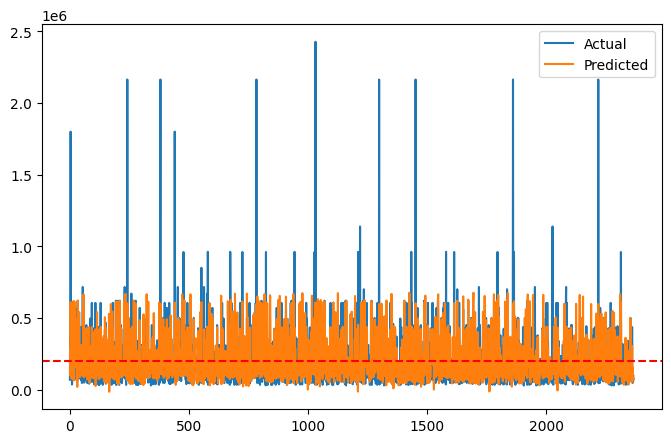

In [5]:
import matplotlib.pyplot as plt
# 실젯값, 예측값 시각화
plt.figure(figsize=(8, 5))
plt.plot(y_test.values)
plt.plot(y_pred)
plt.axhline(y_test.mean(), color='r', linestyle='--')
plt.legend(['Actual', 'Predicted'])
plt.show()

In [6]:
# 함수 불러오기
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# 성능 평가
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', mean_squared_error(y_test, y_pred, squared=False))
print('R2-Score:', r2_score(y_test, y_pred))

MAE: 86567.98763749223
MSE: 23777964589.143097
RMSE: 154201.05249038702
R2-Score: 0.44137106601428144


In [7]:
# 성능 평가
print('Score:', model.score(X_test, y_test))

Score: 0.44137106601428144


In [8]:
def predict_hotel_price(Date, Rating, Grade, Address):
    # Preprocess the user input to match the format of the training data
    user_input = pd.DataFrame({
        'Date': [Date],
        'Rating': [Rating],
        'Grade': [Grade],
        'Address': [Address]
    })

    # Perform one-hot encoding for categorical features
    user_input_encoded = encoder.transform(user_input)

    # Make predictions
    predicted_price = model.predict(user_input_encoded)

    return predicted_price[0]

# Example usage
Date = "2023-07-25"
Rating = 7.8
Grade = 5
Address = "서귀포"

predicted_value = predict_hotel_price( Date, Rating, Grade, Address)
print(f"Predicted price on {Date} with {Rating} Rating, Grade {Grade}, and Address {Address}: {predicted_value}")

Predicted price on 2023-07-25 with 7.8 Rating, Grade 5, and Address 서귀포: 232347.9016534168


In [9]:
import joblib

#피클링 파일 생성
joblib.dump(model, './hotel_model.pkl')

['./hotel_model.pkl']

In [10]:
joblib.dump(encoder, './hotel_encoder.pkl')

['./hotel_encoder.pkl']